# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
7. Which giftors provide the most money, in total?

In [4]:
#importing necessary packages and packages we have used in past assignments
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
#importing the CSV file and calling the first few rows to examine the data
Foreign_gifts= pd.read_csv("https://raw.githubusercontent.com/gatesz33/EDA/refs/heads/main/assignment/data/ForeignGifts_edu.csv")
Foreign_gifts.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


Text(0.5, 1.0, 'Log of Foreign Gift Amounts Given to Academic Institutions')

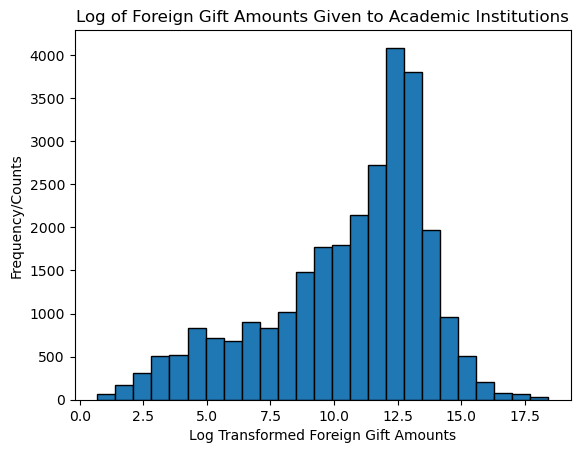

In [6]:
Foreign_gifts["Foreign Gift Amount"].value_counts() #Looking at the value counts because the original histogram yielded a badly scaled graph
negative_values = Foreign_gifts["Foreign Gift Amount"][Foreign_gifts["Foreign Gift Amount"] < 0] #Finding the negative values and labeling them "negative_values"
negative_values.unique() #Examining the negative values
no_negs = Foreign_gifts.loc[Foreign_gifts["Foreign Gift Amount"] >= 0, "Foreign Gift Amount"] #Excluding negative values because they don't make sense in this context and will mess with log equation
log_data = np.log1p(no_negs) #Taking the log of all positive Foreign Gift Amounts, this is a transformation that will compress the values and reduces the skewness of the graph that is preventing us from seeing the data
plt.hist(log_data, bins=25, edgecolor="black") #Making the histogram with the transformed values
plt.xlabel("Log Transformed Foreign Gift Amounts")
plt.ylabel("Frequency/Counts")
plt.title("Log of Foreign Gift Amounts Given to Academic Institutions")

The highest frequency of gifts tend to fall close to 12.5 on the histogram. The inverse natural log of this is $268337.29. Therefore, it seems the majority of gifts center around $270,000. As the gifts get larger ~17.5 or upwards of $39,000,000 there is significantly less of them.

Text(0.5, 1.0, 'Categorizing Gift Types')

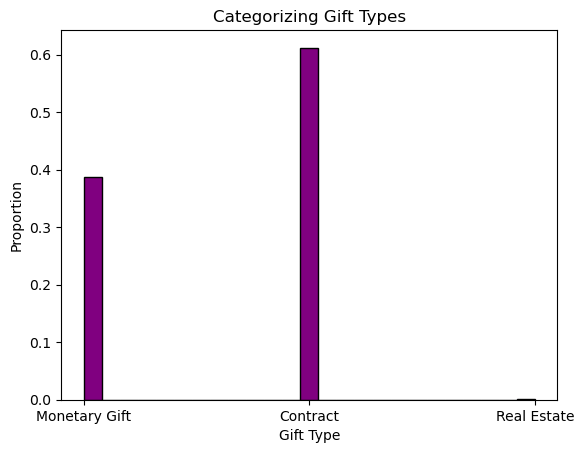

In [8]:
#Creating a histogram that shows the proportions that each gift types are of the total gifts given
plt.hist(Foreign_gifts["Gift Type"], bins=25, edgecolor="black", color="purple", weights=np.ones(len(Foreign_gifts["Gift Type"])) / len(Foreign_gifts["Gift Type"]))
plt.xlabel("Gift Type") #Labeling x axis
plt.ylabel("Proportion") #Labeling y axis
plt.title("Categorizing Gift Types") #Adding a title

From the histogram I've created, we can see that contract gift types are the most common type of gift institutions receive. They make up just a little above 60% of gifts. Monetary gifts are the running up, making up just almost 40%. Real estate, seems to be less than 1% of the gifts that these institutions receive.

Text(0, 0.5, 'Density')

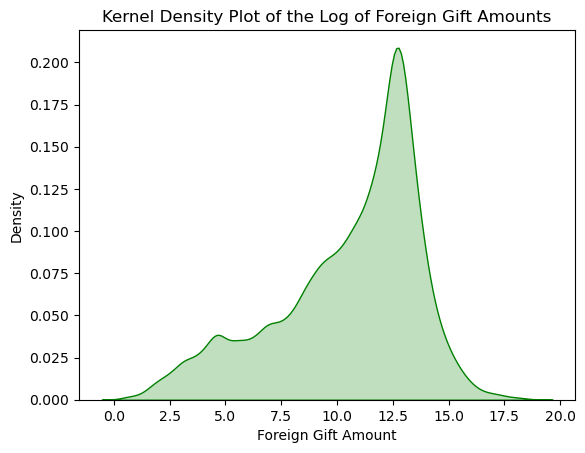

In [10]:
sns.kdeplot(log_data, fill=True, color="green") #Creating a kernal density plot with the log data of foreign gift amounts
plt.title("Kernel Density Plot of the Log of Foreign Gift Amounts") #Adding a title
plt.xlabel("Foreign Gift Amount") #Labeling x axis
plt.ylabel("Density") #Labeling y axis, this plot shows density (probability)

<Axes: xlabel='Log_foreign_gift_amount', ylabel='Density'>

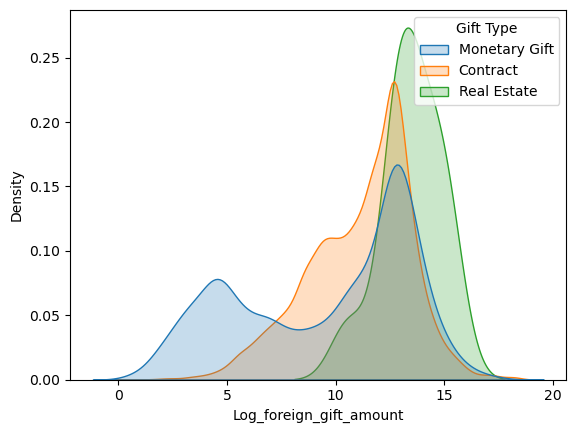

In [11]:
kdp_df = pd.DataFrame({"Log_foreign_gift_amount": log_data,"Gift Type": Foreign_gifts["Gift Type"]}) #Creating df with the log_data and gift type
sns.kdeplot(data=kdp_df, x="Log_foreign_gift_amount", hue="Gift Type", fill=True,common_norm=False) #Using the new df to create a kernel density plot, adding gift type into hue so we can differentiate by gift types
#common_norm=False ensures the area under each curve is the same. It does this so we can examine the distribution, if they were proportional to each other "real estate" practically disappears

In [12]:
print(Foreign_gifts["Country of Giftor"].value_counts().head(15)) #Examining how many times each company appears (we are asked for number of gifts)

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64


In [13]:
institution_receive= Foreign_gifts.groupby("Institution Name")["Foreign Gift Amount"].sum() #Examining how much each institution received and creating a new df, we need the groupby function and aggregation because it's not just counts now
print(institution_receive.sort_values(ascending=False).head(15)) #Sorting the institutions in descending order, in order to return the top gift-receiving institutions

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


Text(0.5, 1.0, 'Total Money Received by Institution')

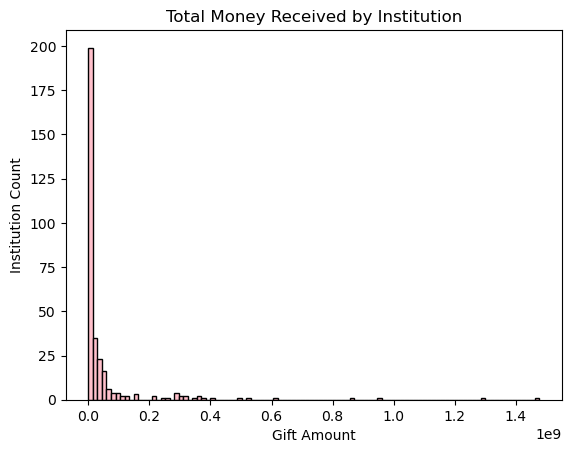

In [14]:
plt.hist(institution_receive, bins=100, edgecolor="black", color="Pink") #Creating a histogram with the df in order to examine how much money each institution received, increased bin size to see differences in foreign gift amounts
plt.xlabel("Gift Amount") #Labeling x axis
plt.ylabel("Institution Count") #Labeling y axis
plt.title("Total Money Received by Institution") #Adding title


Text(0.5, 1.0, 'Log of Gift Amount Received by Institution')

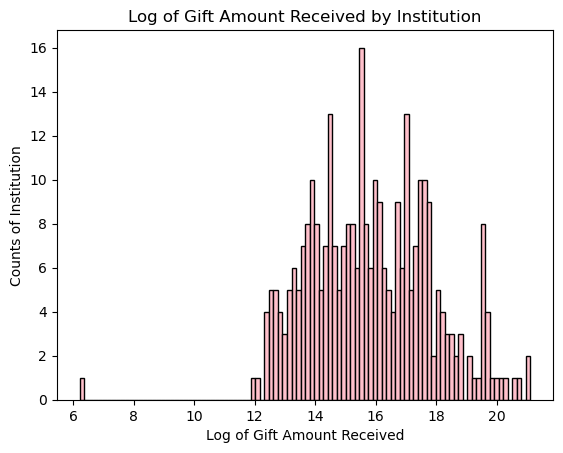

In [15]:
inst_log=np.log1p(institution_receive) #Finding the log of all of the gift amounts, to see if we can reduce skew and look at the data closer
plt.hist(inst_log, bins=100, edgecolor="black", color="Pink") #Creating the histogram, leaving the same number of bins to compare the two histograms
plt.xlabel("Log of Gift Amount Received") #Labeling x axis
plt.ylabel("Counts of Institution") #Labeling y axis
plt.title("Log of Gift Amount Received by Institution") #Adding title

The log-transformed graph can be more telling because log is very sensitive to differences in gift amounts. As a result, we see that the log(gift amount)=6 was received by one institution, but this value dragged the original histogram left. We also see that most institutions received gift amounts centered right around the median of the graph.

In [17]:
Giftor_sums= Foreign_gifts.groupby("Giftor Name")["Foreign Gift Amount"].sum() #Using group by function once again to examine giftors and how much they gave total
print(Giftor_sums.sort_values(ascending=False).head(15)) #Sorting the values in descending order and using head to call the top 15

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [20]:
drill_df=pd.read_csv("https://raw.githubusercontent.com/gatesz33/EDA/refs/heads/main/assignment/data/drilling_rigs.csv") #Reading in the dataframe
drill_df

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991
...,...,...,...,...,...,...,...,...,...,...
618,2024 July,564,22,479,101,519,49,18,586,Not Available
619,2024 August,566,19,483,97,521,48,16,586,Not Available
620,2024 September,567,20,486,97,522,50,15,587,Not Available
621,2024 October,568,18,481,101,517,53,15,585,Not Available


In [21]:
print(len(drill_df)) #Finding the number of observations in the dataframe
print(len(drill_df.columns)) #Finding the number of variables by counting the columns

623
10


In [22]:
drill_df.dtypes #Checking the data types of all of the variables

Month                                                                                          object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                    int64
Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                   int64
Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                     object
Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                   object
Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)     object
Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)    object
Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)       object
Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                      int64
Active Well Service Rig Count (Number of Rigs)                                    

It seems that some of the variables are integers, but Crude Oil Rotary Rigs in Operation up until Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory are all listed as objects. Since the ends of all these variables have "number of rigs in parentheses," I'm suspicious of the fact that these too should be list as int64. As a result, I would use the function pd.to_numeric(drill_df['column1','column2', etc], errors=coerce). Here I will list the columns I mentioned above.gs) 

In [24]:
drill_df['time'] = pd.to_datetime(drill_df['Month'], format='mixed') #Changing the Month variable into datetime
drill_df['time']

0     1973-01-01
1     1973-02-01
2     1973-03-01
3     1973-04-01
4     1973-05-01
         ...    
618   2024-07-01
619   2024-08-01
620   2024-09-01
621   2024-10-01
622   2024-11-01
Name: time, Length: 623, dtype: datetime64[ns]

In [25]:
drill_df['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(drill_df['Active Well Service Rig Count (Number of Rigs)'], errors='coerce') #Casting the column into numeric
drill_df['Active Well Service Rig Count (Number of Rigs)'] = drill_df['Active Well Service Rig Count (Number of Rigs)'].replace('Not Available', np.nan) #Replacing Not Availables with nans
drill_df['Active Well Service Rig Count (Number of Rigs)'] = drill_df['Active Well Service Rig Count (Number of Rigs)'].dropna() #Dropping the nans
print(drill_df['Active Well Service Rig Count (Number of Rigs)']) #Printing column

0      1549.0
1      1677.0
2      1805.0
3      1898.0
4      1991.0
        ...  
618       NaN
619       NaN
620       NaN
621       NaN
622       NaN
Name: Active Well Service Rig Count (Number of Rigs), Length: 623, dtype: float64


In [43]:
drill_df.dropna(subset=['Active Well Service Rig Count (Number of Rigs)'], axis=0) #I saw that the nans were still there, so I dropped rows that had nans for this variable using axis=0

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs),time
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549.0,1973-01-01
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677.0,1973-02-01
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805.0,1973-03-01
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898.0,1973-04-01
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991.0,1973-05-01
...,...,...,...,...,...,...,...,...,...,...,...
586,2021 November,545,15,458,102,503,34,23,560,995.0,2021-11-01
587,2021 December,565,14,475,105,523,31,26,579,982.0,2021-12-01
588,2022 January,583,18,490,111,543,35,23,601,995.0,2022-01-01
589,2022 February,622,14,514,121,578,32,26,636,1000.0,2022-02-01


[Text(0.5, 1.0, 'Numer of Active Well Service Rigs'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Number of Rigs')]

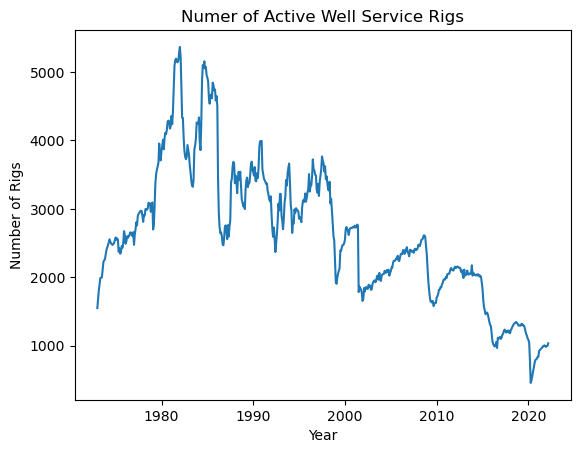

In [49]:
fig= sns.lineplot(data = drill_df, x = 'time', y = 'Active Well Service Rig Count (Number of Rigs)') #Creating a time series using seaborn
fig.set(title="Numer of Active Well Service Rigs", xlabel='Year', ylabel='Number of Rigs') #Adding in a title and axis labels

According to this time series plot, it's quite evident that the number of active well service rigs has decreased as time has gone on. The number of rigs really peaked around 1980, by 2020, we witness a significant dip in the number of rigs.

In [52]:
y = drill_df['Active Well Service Rig Count (Number of Rigs)'].to_numpy() #Casting the column from the dataframe into a numpy array
diff = y[1:] - y[:(len(y)-1)] #Using this formula to find the first difference
drill_df['Rig Count Change'] = np.concatenate(([np.nan], diff)) #Adding a new column to account for the first difference into our original df
drill_df = drill_df.dropna(subset=['Rig Count Change']) #Dropping the nans from our new column

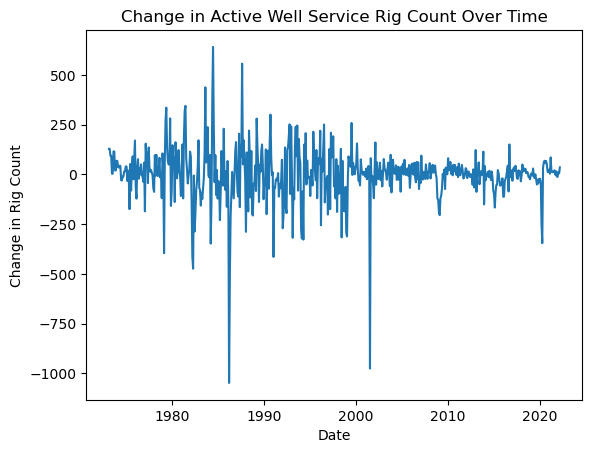

In [98]:
fig = sns.lineplot(data=drill_df, x='time', y='Rig Count Change') #Creating a timeseries plot with the differences
fig.set(title='Change in Active Well Service Rig Count Over Time', xlabel='Date', ylabel='Change in Rig Count') #Adding in a title and axis labels
plt.show()

In [76]:
off_on_melt= drill_df.melt(id_vars=['time'], value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'])
#Melting the two columns together, keeping time consistent

In [78]:
off_on_melt #Checking on the new df

,time,variable,value
0,1973-02-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,1037
1,1973-03-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,959
2,1973-04-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,914
3,1973-05-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,974
4,1973-06-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,1042
...,...,...,...
1175,2021-11-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,15
1176,2021-12-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,14
1177,2022-01-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,18
1178,2022-02-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,14


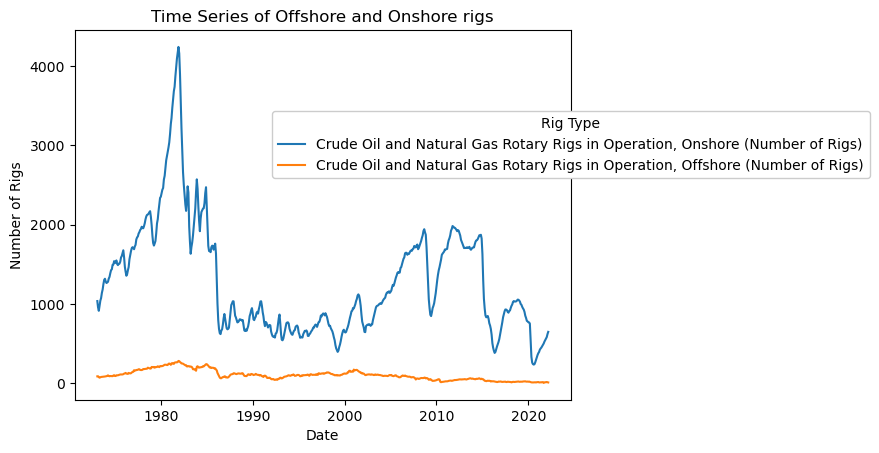

In [96]:
fig= sns.lineplot(data = off_on_melt, x = 'time', y = 'value',hue='variable') #Creating a time series plot with the melted data
fig.set(title="Time Series of Offshore and Onshore rigs", xlabel='Date', ylabel='Number of Rigs') #Adding in a title and axis labels
plt.legend(title='Rig Type', loc='upper center', bbox_to_anchor=(1, 0.8),framealpha=1) #Fixing the legend, positioning it and making it less transparent